# K-Means: Python vs NumPy vs CUDA [Mighty4]
#### Author: Diogo Silva

This notebook contains an analysis of the results from executing the different implementations (CUDA, NumPy, Python) of the K-Means algorithm.

The machine technical specifications of the machine (Mighty4) are:
- OS: Ubuntu 12.04.5 LTS
- CPU: Intel(R) Core(TM) i7-4930K CPU @ 3.40GHz, 12 cores
- GPU: NVIDIA QUADRO K600, 192 CUDA cores, 1024 MBytes

In [1]:
# necessary imports
%pylab inline
import seaborn as sns
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
# locations of the results
results_filename="/home/chiroptera/workspace/QCThesis/CUDA/tests/test1v3/results.csv" #local
#results_filename="https://raw.githubusercontent.com/Chiroptera/QCThesis/master/CUDA/tests/test1v3/results.csv" #git repo

In [3]:
results = pd.read_csv(results_filename)

In [4]:
print "Structure of the results"
results.head()

Structure of the results


,type,N,D,NATC,K,iters,R,time
0,cuda,1000,2,20,5,3,0,0.018422
1,cuda,1000,2,20,5,3,1,0.010772
2,cuda,1000,2,20,5,3,2,0.010947
3,cuda,1000,2,20,5,3,3,0.011002
4,cuda,1000,2,20,5,3,4,0.010803


In [5]:
N_labels=[1e3,5e3,1e4,5e4,1e5,5e5,1e6,2e6,4e6]
K_labels=[5,10,20,30,40,50,100,250,500]

Some of the parameters were don't change in these results, so we can delete them (natural number of clusters, dimensionality and number of iterations). Furthermore, We can delete the rounds column because it becomes useless after averaging the times.

In [6]:
results.drop(['R','NATC','D','iters'], axis=1, inplace=True)

results.head()

,type,N,K,time
0,cuda,1000,5,0.018422
1,cuda,1000,5,0.010772
2,cuda,1000,5,0.010947
3,cuda,1000,5,0.011002
4,cuda,1000,5,0.010803


Below is some statistics about the timings for the rounds. The important thing to notice is that there is **low variance** on the data, which suggests that the **results are consistent**.

In [7]:
rounds = results.groupby(['type','N','K'],as_index = True)
results_mean = rounds.mean()
rounds.describe()

time
type   N      K                     
cuda   1000   5   count    10.000000
                  mean      0.011657
                  std       0.002379
                  min       0.010772
                  25%       0.010802
                  50%       0.010969
                  75%       0.011013
                  max       0.018422
              10  count    10.000000
                  mean      0.011654
                  std       0.000098
                  min       0.011525
                  25%       0.011546
                  50%       0.011702
                  75%       0.011730
                  max       0.011763
              20  count    10.000000
                  mean      0.013044
                  std       0.000132
                  min       0.012847
                  25%       0.012932
                  50%       0.013095
                  75%       0.013118
                  max       0.013271
              30  count    10.000000
                  mean      0.014391
                  std       0.000108
                  min       0.014227
                  25%       0.014297
                  50%       0.014419
...                              ...
python 100000 50  std       0.331483
                  min     147.291877
                  25%     147.650271
                  50%     147.937354
                  75%     148.085570
                  max     148.264515
              100 count    10.000000
                  mean    295.139632
                  std       0.665021
                  min     294.046803
                  25%     294.619269
                  50%     295.177557
                  75%     295.750472
                  max     295.834599
              250 count    10.000000
                  mean    737.963793
                  std       1.319045
                  min     736.230537
                  25%     736.959910
                  50%     737.738205
                  75%     738.773420
                  max     740.377131
              500 count     6.000000
                  mean   1478.375968
                  std       3.854675
                  min    1473.342895
                  25%    1475.384404
                  50%    1478.773938
                  75%    1481.669745
                  max    1482.475464

[1656 rows x 1 columns]

# Time analysis

This section explores some of the results of the runtimes of the algorithms.

In [8]:
times = results_mean.loc["cuda"]
times['cuda']=times['time']
times['numpy']=results_mean.loc["numpy"]
times['python']=results_mean.loc["python"]
times['s_cuda_np']=times['numpy']/times['cuda']
times['s_cuda_py']=times['python']/times['cuda']
times['s_np_py']=times['python']/times['numpy']
times

time       cuda       numpy      python  s_cuda_np  \
N       K                                                              
1000    5     0.011657   0.011657    0.001088    0.149803   0.093359   
        10    0.011654   0.011654    0.001989    0.297293   0.170656   
        20    0.013044   0.013044    0.003741    0.592271   0.286777   
        30    0.014391   0.014391    0.005475    0.886906   0.380455   
        40    0.015639   0.015639    0.007243    1.180782   0.463123   
        50    0.016542   0.016542    0.008924    1.474845   0.539479   
        100   0.020595   0.020595    0.017499    2.948110   0.849640   
        250   0.035546   0.035546    0.042642    7.365657   1.199627   
        500   0.058691   0.058691    0.083086   14.744017   1.415643   
5000    5     0.010678   0.010678    0.003097    0.747029   0.290065   
        10    0.011829   0.011829    0.005419    1.483516   0.458114   
        20    0.014025   0.014025    0.009845    2.952777   0.701950   
        30    0.016112   0.016112    0.014190    4.427816   0.880690   
        40    0.018134   0.018134    0.018639    5.898209   1.027853   
        50    0.020143   0.020143    0.022829    7.371626   1.133379   
        100   0.030123   0.030123    0.044517   14.712767   1.477872   
        250   0.059804   0.059804    0.108561   36.770739   1.815268   
        500   0.108246   0.108246    0.215950   73.622404   1.995000   
10000   5     0.013008   0.013008    0.005533    1.497467   0.425356   
        10    0.014796   0.014796    0.009632    2.978940   0.650943   
        20    0.018169   0.018169    0.017264    5.927332   0.950223   
        30    0.021355   0.021355    0.024746    8.870301   1.158811   
        40    0.024410   0.024410    0.032416   11.815988   1.327966   
        50    0.027534   0.027534    0.039630   14.757072   1.439310   
        100   0.042877   0.042877    0.076960   29.519469   1.794891   
        250   0.088375   0.088375    0.187472   73.647757   2.121321   
        500   0.164026   0.164026    0.371771  147.367725   2.266537   
50000   5     0.032128   0.032128    0.024914    7.490281   0.775454   
        10    0.039372   0.039372    0.042934   14.845817   1.090479   
        20    0.052372   0.052372    0.075869   29.593154   1.448660   
...                ...        ...         ...         ...        ...   
500000  100   1.301461   1.301461    3.437889         NaN   2.641562   
        250   2.867981   2.867981    8.302933         NaN   2.895044   
        500   5.458327   5.458327   16.462744         NaN   3.016078   
1000000 5     0.487142   0.487142    0.538290         NaN   1.104997   
        10    0.637080   0.637080    0.909662         NaN   1.427861   
        20    0.882651   0.882651    1.624348         NaN   1.840306   
        30    1.103017   1.103017    2.324859         NaN   2.107726   
        40    1.328702   1.328702    3.041958         NaN   2.289421   
        50    1.549947   1.549947    3.716820         NaN   2.398030   
        100   2.610552   2.610552    7.195779         NaN   2.756420   
        250   5.724244   5.724244   17.406081         NaN   3.040765   
        500  10.884659  10.884659   34.271032         NaN   3.148563   
2000000 5     1.015426   1.015426    1.103129         NaN   1.086371   
        10    1.354407   1.354407    1.915013         NaN   1.413913   
        20    1.897077   1.897077    3.368870         NaN   1.775822   
        30    2.358479   2.358479    4.823610         NaN   2.045221   
        40    2.823537   2.823537    6.276152         NaN   2.222798   
        50    3.242203   3.242203    7.645525         NaN   2.358127   
        100   5.365364   5.365364   14.788860         NaN   2.756357   
        250  11.581239  11.581239   35.621793         NaN   3.075819   
        500  21.875830  21.875830   70.059141         NaN   3.202582   
4000000 5     2.137429   2.137429    2.288111         NaN   1.070497   
        10    2.907340   2.907340    3.943899         NaN 

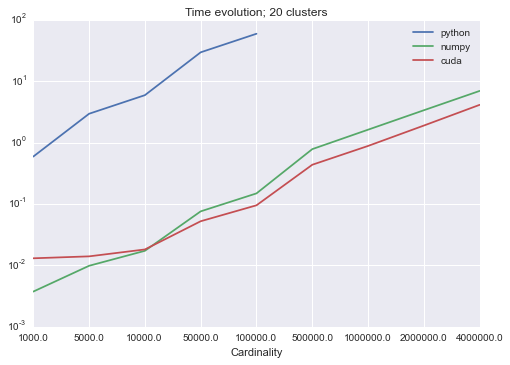

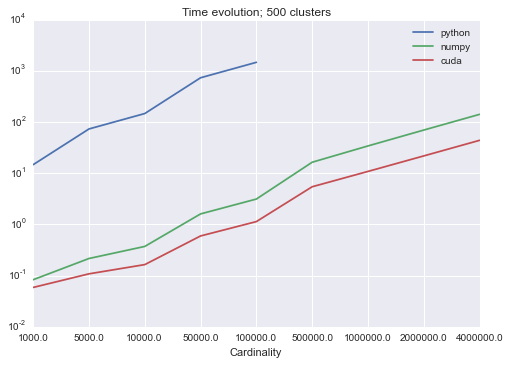

In [9]:
a=times.groupby(level='K')
#a.get_group(20)['python'].plot(subplots=True,layout=(2,2))
p=a.get_group(20)[['python','numpy','cuda']].plot(title="Time evolution; 20 clusters",logy=True)
plt.xticks(range(len(N_labels)),N_labels)
plt.xlabel("Cardinality")
a.get_group(500)[['python','numpy','cuda']].plot(title="Time evolution; 500 clusters",logy=True)
plt.xticks(range(len(N_labels)),N_labels)
plt.xlabel("Cardinality")

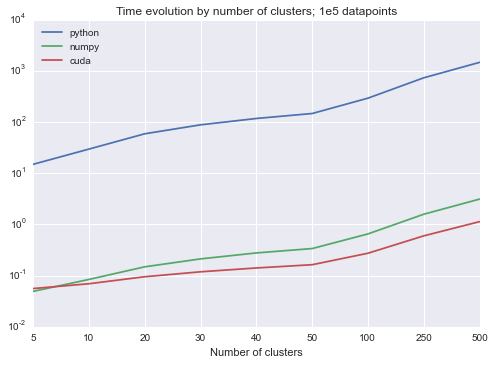

In [10]:
b=times.groupby(level='N')
b.get_group(1e5)[['python','numpy','cuda']].plot(title="Time evolution by number of clusters; 1e5 datapoints",logy=True)
plt.xticks(range(len(K_labels)),K_labels)
plt.xlabel("Number of clusters")

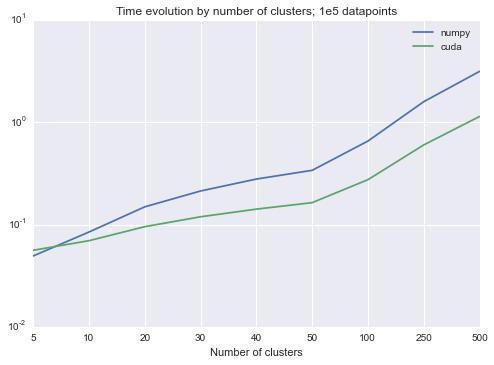

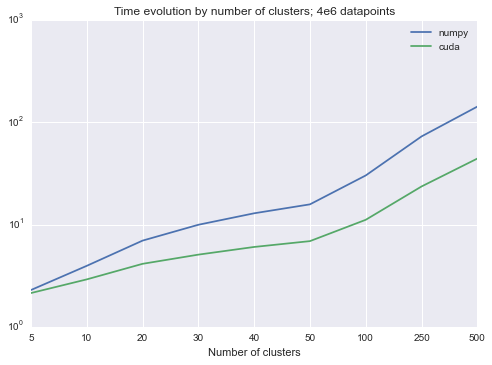

In [11]:
b.get_group(1e5)[['numpy','cuda']].plot(title="Time evolution by number of clusters; 1e5 datapoints",logy=True)
plt.xticks(range(len(K_labels)),K_labels)
plt.xlabel("Number of clusters")

b.get_group(4e6)[['numpy','cuda']].plot(title="Time evolution by number of clusters; 4e6 datapoints",logy=True)
plt.xticks(range(len(K_labels)),K_labels)
plt.xlabel("Number of clusters")

# Speedup over NumPy

In [12]:
s_cuda_np = results_mean.loc['numpy'] / results_mean.loc['cuda']
#s_cuda_np['speedup']=s_cuda_np['time']

In [13]:
s_cuda_np.groupby(level=['K']).describe()

time
K                  
5   count  9.000000
    mean   0.754069
    std    0.387903
    min    0.093359
    25%    0.425356
    50%    0.880194
    75%    1.070497
    max    1.104997
10  count  9.000000
    mean   1.022415
    std    0.475607
    min    0.170656
    25%    0.650943
    50%    1.214968
    75%    1.413913
    max    1.427861
20  count  9.000000
    mean   1.338898
    std    0.558877
    min    0.286777
    25%    0.950223
    50%    1.563475
    75%    1.775822
    max    1.840306
30  count  9.000000
    mean   1.562430
    std    0.612939
    min    0.380455
    25%    1.158811
    50%    1.787172
...             ...
50  std    0.654328
    min    0.539479
    25%    1.439310
    50%    2.069942
    75%    2.309328
    max    2.398030
100 count  9.000000
    mean   2.185412
    std    0.673399
    min    0.849640
    25%    1.794891
    50%    2.385635
    75%    2.713159
    max    2.756420
250 count  9.000000
    mean   2.494653
    std    0.656791
    min    1.199627
    25%    2.121321
    50%    2.646294
    75%    3.040765
    max    3.084079
500 count  9.000000
    mean   2.635802
    std    0.625154
    min    1.415643
    25%    2.266537
    50%    2.758689
    75%    3.148563
    max    3.221529

[72 rows x 1 columns]

([<matplotlib.axis.XTick at 0x7f0a03352610>,
 <a list of 9 Text xticklabel objects>)

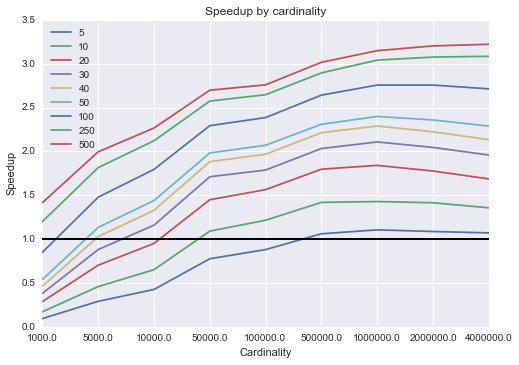

In [14]:
for key, grp in s_cuda_np.groupby(level=['K']):
    plt.plot(grp['time'],label=key)#grp.index.levels[0],
    
plt.legend(loc='best')
plt.title("Speedup by cardinality")
plt.plot([0, 8], [1, 1], 'k-', lw=2)
plt.ylabel("Speedup")
plt.xlabel("Cardinality")

plt.xticks(range(len(N_labels)),N_labels)

In [15]:
s_cuda_np.groupby(level=['N']).describe()

time
N                      
1000    count  9.000000
        mean   0.599862
        std    0.460553
        min    0.093359
        25%    0.286777
        50%    0.463123
        75%    0.849640
        max    1.415643
5000    count  9.000000
        mean   1.086688
        std    0.584669
        min    0.290065
        25%    0.701950
        50%    1.027853
        75%    1.477872
        max    1.995000
10000   count  9.000000
        mean   1.348373
        std    0.630611
        min    0.425356
        25%    0.950223
        50%    1.327966
        75%    1.794891
        max    2.266537
50000   count  9.000000
        mean   1.828253
        std    0.648528
        min    0.775454
        25%    1.448660
        50%    1.882489
...                 ...
500000  std    0.655490
        min    1.060330
        25%    1.796915
        50%    2.213048
        75%    2.641562
        max    3.016078
1000000 count  9.000000
        mean   2.234899
        std    0.696925
        min    1.104997
        25%    1.840306
        50%    2.289421
        75%    2.756420
        max    3.148563
2000000 count  9.000000
        mean   2.215223
        std    0.721733
        min    1.086371
        25%    1.775822
        50%    2.222798
        75%    2.756357
        max    3.202582
4000000 count  9.000000
        mean   2.168012
        std    0.741724
        min    1.070497
        25%    1.685954
        50%    2.133544
        75%    2.713159
        max    3.221529

[72 rows x 1 columns]

([<matplotlib.axis.XTick at 0x7f0a03284150>,
 <a list of 9 Text xticklabel objects>)

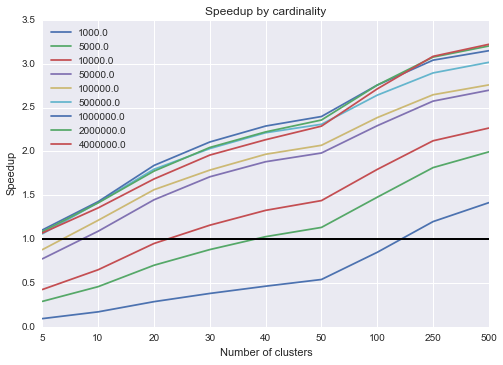

In [16]:
for key, grp in s_cuda_np.groupby(level=['N']):
    plt.plot(grp['time'],label=key)#grp.index.levels[0],
    
plt.plot([0, 8], [1, 1], 'k-', lw=2) #slowdown/speedup threshold
plt.legend(loc='best')

plt.title("Speedup by cardinality")
plt.ylabel("Speedup")
plt.xlabel("Number of clusters")

plt.xticks(range(len(K_labels)),K_labels)

# Speedup over Python

In [17]:
s_cuda_py = results_mean.loc['python'] / results_mean.loc['cuda']

([<matplotlib.axis.XTick at 0x7f0a01922a50>,
 <a list of 9 Text xticklabel objects>)

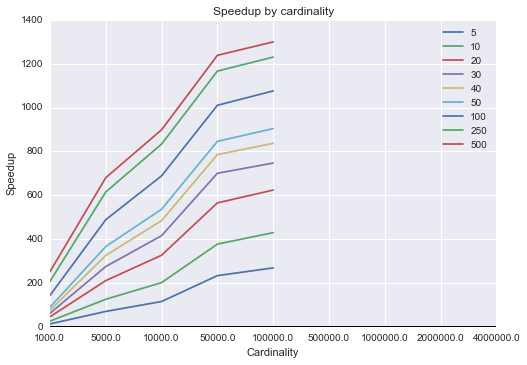

In [18]:
for key, grp in s_cuda_py.groupby(level=['K']):
    plt.plot(grp['time'],label=key)#grp.index.levels[0],
    
plt.plot([0, 8], [1, 1], 'k-', lw=2) #slowdown/speedup threshold
plt.legend(loc='best')

plt.title("Speedup by cardinality")
plt.ylabel("Speedup")
plt.xlabel("Cardinality")

plt.xticks(range(len(N_labels)),N_labels)

([<matplotlib.axis.XTick at 0x7f0a03da2f50>,
 <a list of 9 Text xticklabel objects>)

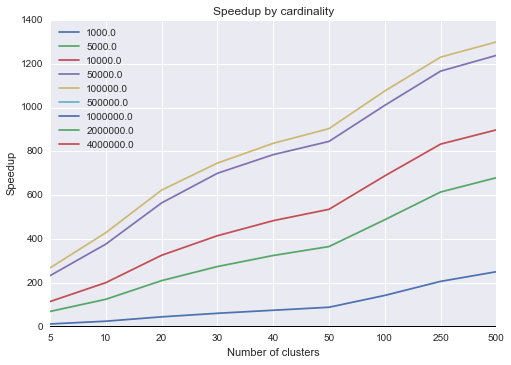

In [19]:
for key, grp in s_cuda_py.groupby(level=['N']):
    plt.plot(grp['time'],label=key)#grp.index.levels[0],
    
plt.plot([0, 8], [1, 1], 'k-', lw=2) #slowdown/speedup threshold
plt.legend(loc='best')

plt.title("Speedup by cardinality")
plt.ylabel("Speedup")
plt.xlabel("Number of clusters")

plt.xticks(range(len(K_labels)),K_labels)